# TASK #2: MOUNT DRIVE AND IMPORT LIBRARIES/DATASETS

- In this case study, we want to classify images of traffic signs using deep Convolutional Neural Networks (CNNs).
- The dataset consists of 43 different classes of images. 
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons

- Citation
J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. 
@inproceedings{Stallkamp-IJCNN-2011, author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel}, booktitle = {IEEE International Joint Conference on Neural Networks}, title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition}, year = {2011}, pages = {1453--1460} }

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1tQ2HkQdxCUpAo4twbqN6mu7FYD7Ry5tq' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1tQ2HkQdxCUpAo4twbqN6mu7FYD7Ry5tq" -O train.p && rm -rf /tmp/cookies.txt
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1zJxB1YzBYuImaHBSxWGN-ZXPDRYN_CTX' -O valid.p
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1jZhZpEZkYFaaPPAwfd1cB8e-FK0aoeC0' -O test.p

--2020-09-29 09:06:22--  https://docs.google.com/uc?export=download&confirm=OhMc&id=1tQ2HkQdxCUpAo4twbqN6mu7FYD7Ry5tq
Resolving docs.google.com (docs.google.com)... 64.233.189.102, 64.233.189.100, 64.233.189.139, ...
Connecting to docs.google.com (docs.google.com)|64.233.189.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-a8-docs.googleusercontent.com/docs/securesc/a1jkmakg0o6duqb5jqjduv5q2lrq5db7/p90o1530dmcn9stl43dv5amdvve8f8f5/1601370375000/17242455652310080862/09221084909028739349Z/1tQ2HkQdxCUpAo4twbqN6mu7FYD7Ry5tq?e=download [following]
--2020-09-29 09:06:23--  https://doc-14-a8-docs.googleusercontent.com/docs/securesc/a1jkmakg0o6duqb5jqjduv5q2lrq5db7/p90o1530dmcn9stl43dv5amdvve8f8f5/1601370375000/17242455652310080862/09221084909028739349Z/1tQ2HkQdxCUpAo4twbqN6mu7FYD7Ry5tq?e=download
Resolving doc-14-a8-docs.googleusercontent.com (doc-14-a8-docs.googleusercontent.com)... 108.177.125.132, 2404:6800:4008:c01::84
Connectin

In [3]:
with open("/content/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("/content/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("/content/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [4]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [5]:
X_train.shape, y_train.shape, X_validation.shape, y_validation.shape, X_test.shape, y_test.shape

((34799, 32, 32, 3),
 (34799,),
 (4410, 32, 32, 3),
 (4410,),
 (12630, 32, 32, 3),
 (12630,))

# TASK #3: PERFROM IMAGES VISUALIZATION

25

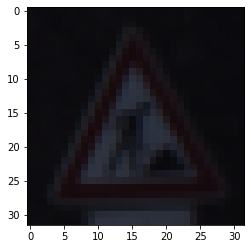

In [6]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

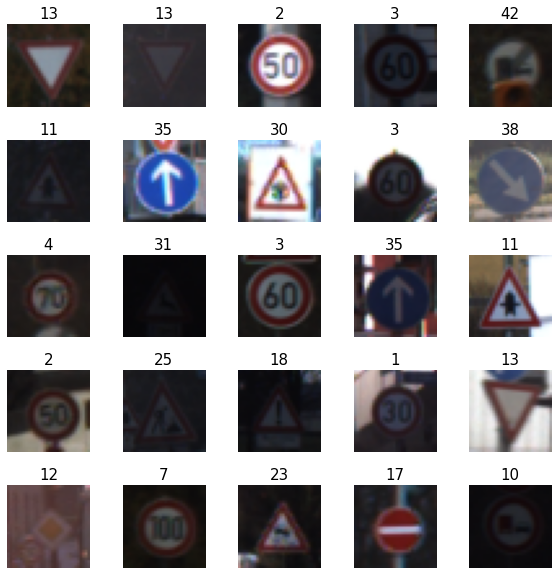

In [7]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( X_train[index])
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# TASK #4: CONVERT IMAGES TO GRAYSCALE AND PERFORM NORMALIZATION

In [8]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

#Since its an RGB image, so it means that you have add r with g with b and then divide it by 3 to get your desired grayscale image. Its done in this way. If you have an color image like the image shown above and you want to convert it into grayscale using average method.

In [9]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)

In [10]:
X_train_gray.shape, y_train.shape, X_validation_gray.shape, y_validation.shape, X_test_gray.shape, y_test.shape

((34799, 32, 32, 1),
 (34799,),
 (4410, 32, 32, 1),
 (4410,),
 (12630, 32, 32, 1),
 (12630,))

In [11]:
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

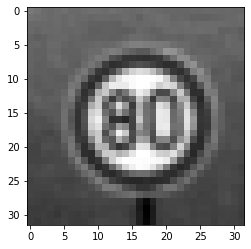

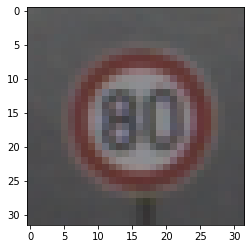

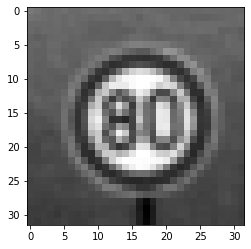

In [12]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

#Building the model

# Data Augmentation

(32, 32, 32, 1)


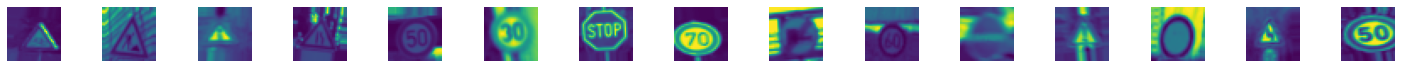

In [13]:
from keras.preprocessing.image import ImageDataGenerator
 
datagen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.3,
                            shear_range=0.1,
                            rotation_range=9.)
 
datagen.fit(X_train)
batches = datagen.flow(X_train_gray_norm, y_train, batch_size = 32)
X_batch, y_batch = next(batches)
 
fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()
 
for i in range(15):
    axs[i].imshow(X_batch[i].reshape(32, 32))
    axs[i].axis("off")
 
print(X_batch.shape)

# One-Hot encoding of y

In [14]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, 43)
y_validation = to_categorical(y_validation, 43)
y_test = to_categorical(y_test, 43)

# Base Model

- Input Layer
- 3 Convolution Layer
- 2 Maxpool layer with dropout layer
- 1 Flatten layer
- 1 Dense Layer
- Output Layer


In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.optimizers import Adam, Adamax, RMSprop, SGD
import keras
import tensorflow as tf

keras.backend.clear_session()

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train_gray_norm.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation of the model
model.compile(
    loss='categorical_crossentropy', 
    optimizer=Adam(), 
    metrics=['accuracy']
)

# Fitting the model with 20 epochs

In [16]:
#using ten epochs for the training and saving the accuracy for each epoch
epochs = 20
history = model.fit(datagen.flow(X_train_gray_norm, y_train, batch_size=32), epochs=epochs, validation_data=(X_validation_gray_norm, y_validation))

Epoch 1/20
1088/1088 [==============================] - 12s 11ms/step - loss: 2.0011 - accuracy: 0.4421 - val_loss: 0.3719 - val_accuracy: 0.8803
Epoch 2/20
1088/1088 [==============================] - 12s 11ms/step - loss: 0.7422 - accuracy: 0.7746 - val_loss: 0.1484 - val_accuracy: 0.9608
Epoch 3/20
1088/1088 [==============================] - 12s 11ms/step - loss: 0.4762 - accuracy: 0.8532 - val_loss: 0.0810 - val_accuracy: 0.9810
Epoch 4/20
1088/1088 [==============================] - 12s 11ms/step - loss: 0.3813 - accuracy: 0.8822 - val_loss: 0.0815 - val_accuracy: 0.9726
Epoch 5/20
1088/1088 [==============================] - 12s 11ms/step - loss: 0.3095 - accuracy: 0.9082 - val_loss: 0.0453 - val_accuracy: 0.9896
Epoch 6/20
1088/1088 [==============================] - 12s 11ms/step - loss: 0.2786 - accuracy: 0.9155 - val_loss: 0.0491 - val_accuracy: 0.9855
Epoch 7/20
1088/1088 [==============================] - 12s 11ms/step - loss: 0.2539 - accuracy: 0.9205 - val_loss: 0.0330 -

# Testing the model on a test set

In [17]:
score = model.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 1s 2ms/step - loss: 0.0878 - accuracy: 0.9819
Test Accuracy: 0.98186856508255


# Model Assessment on test set

In [18]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

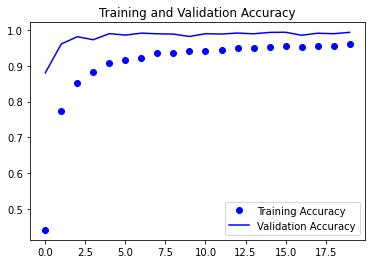

In [19]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

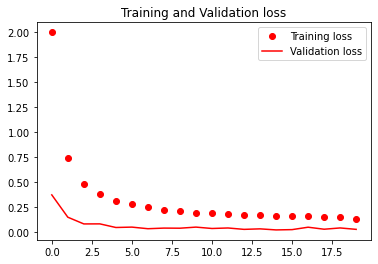

In [20]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [28]:
predicted_classes = model.predict_classes(X_test_gray_norm)
y_true = np.argmax(y_test, axis=1)

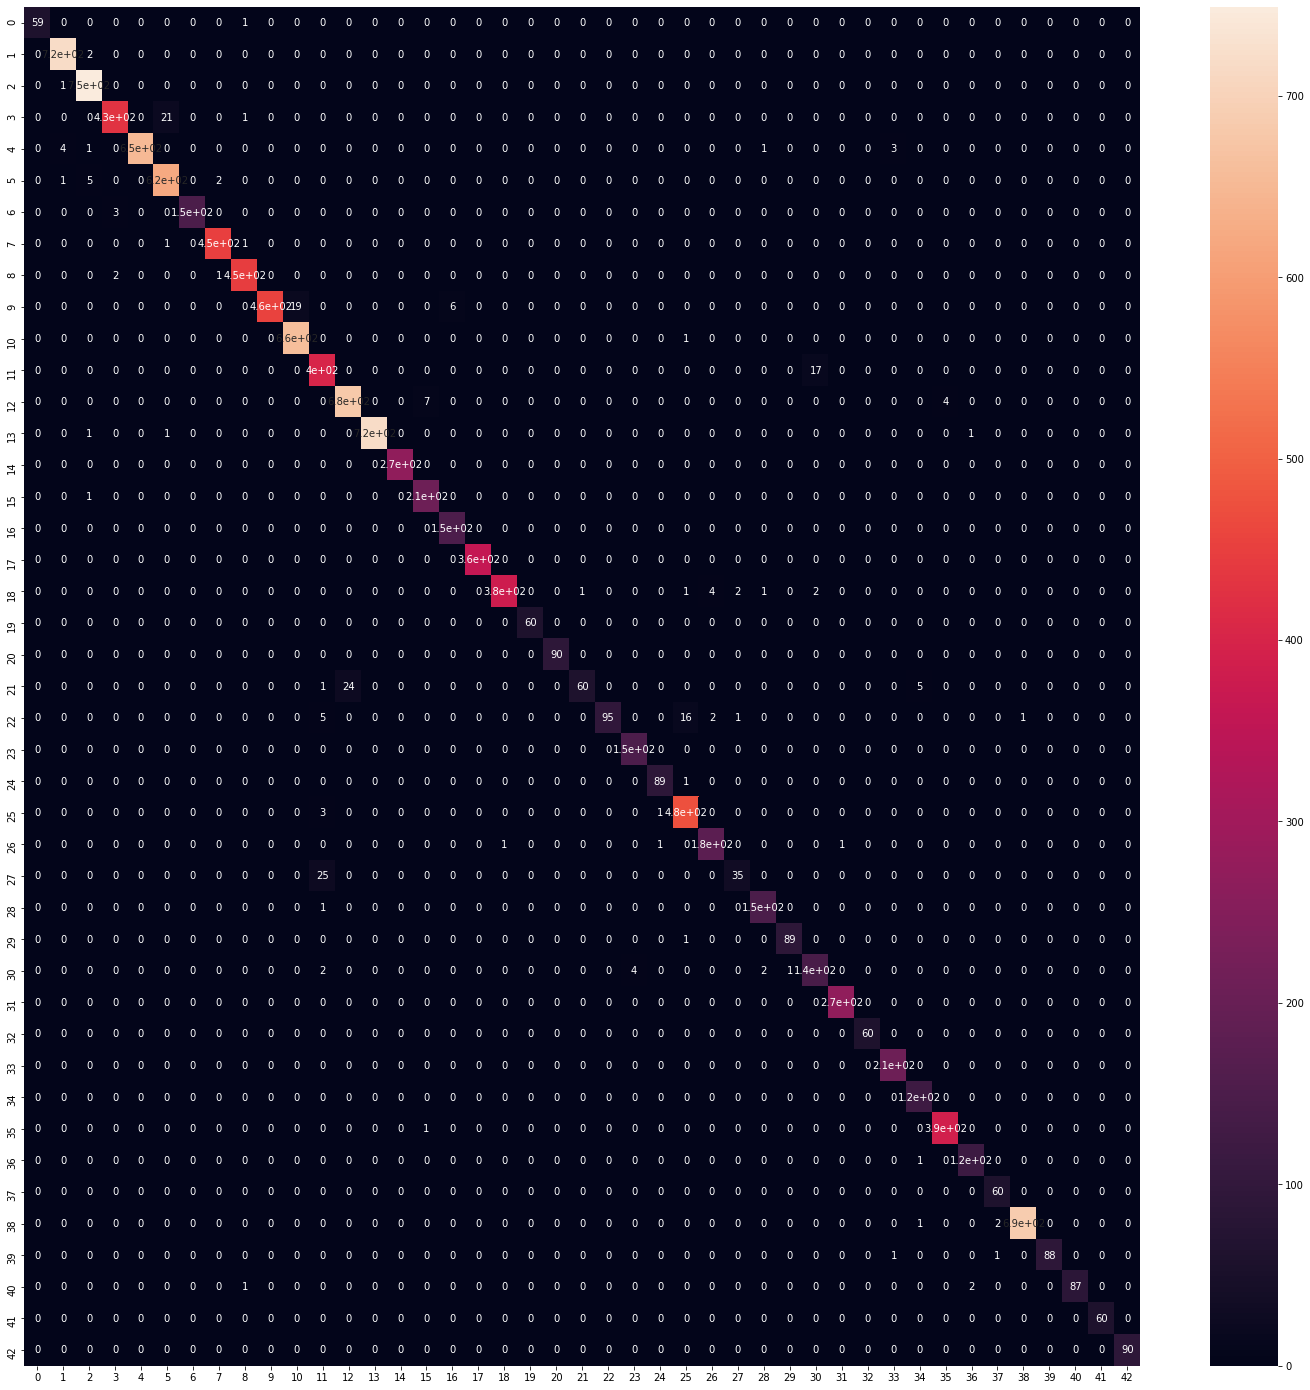

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

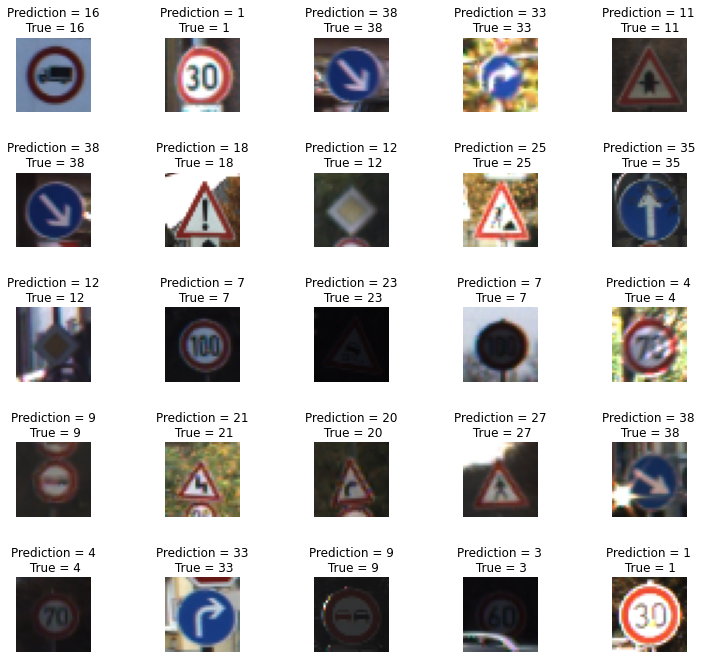

In [30]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

# Base model with data augmentation gives best accuracy